In [586]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

In [587]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'data/magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values.astype('float64')
Y = data['identity'].values.astype('int64')

In [588]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.33, random_state=None) 
train_Features[:2]

array([[ 1.20062215,  1.03724385,  2.80855211, -1.55532876, -1.4492823 ,
        -0.40791752,  1.43073342,  0.98836037, -0.98907297,  1.57180855],
       [ 0.05131148, -0.30155318,  0.19379117, -0.18394714,  0.30353366,
        -0.68752968,  0.51154668, -0.45189778, -0.76086108,  1.3898504 ]])

In [589]:
test_Features[:2]

array([[ 0.82555613,  1.09063002,  2.50680823, -1.42623181, -1.37960402,
         0.30735913,  1.30310291, -1.33892406, -1.02572019,  1.66667027],
       [ 0.10545211,  1.22291261,  0.69867258, -1.10841261, -1.09727125,
         0.20078278,  0.63354764, -1.85709548,  0.54071673, -0.64231421]])

In [590]:
train_Label[:4]

array([1, 0, 1, 1])

In [591]:
train_Features.shape

(12743, 10)

In [592]:
test_Label[:4]

array([1, 0, 1, 0])

In [593]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [594]:
model = Sequential()

In [595]:
model.add(Dense(units=20,  input_dim=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [596]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [597]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 20)                220       
_________________________________________________________________
dense_145 (Dense)            (None, 1)                 21        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [598]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [599]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=90, 
                         batch_size=400,verbose=2,callbacks=[early_stopping])

Train on 11468 samples, validate on 1275 samples
Epoch 1/90
 - 2s - loss: 0.6855 - acc: 0.7123 - val_loss: 0.6761 - val_acc: 0.7349
Epoch 2/90
 - 0s - loss: 0.6601 - acc: 0.7566 - val_loss: 0.6428 - val_acc: 0.7490
Epoch 3/90
 - 0s - loss: 0.6176 - acc: 0.7679 - val_loss: 0.5962 - val_acc: 0.7553
Epoch 4/90
 - 0s - loss: 0.5677 - acc: 0.7762 - val_loss: 0.5495 - val_acc: 0.7694
Epoch 5/90
 - 0s - loss: 0.5220 - acc: 0.7857 - val_loss: 0.5098 - val_acc: 0.7843
Epoch 6/90
 - 0s - loss: 0.4857 - acc: 0.7938 - val_loss: 0.4797 - val_acc: 0.7890
Epoch 7/90
 - 0s - loss: 0.4603 - acc: 0.7976 - val_loss: 0.4597 - val_acc: 0.7953
Epoch 8/90
 - 0s - loss: 0.4441 - acc: 0.8003 - val_loss: 0.4473 - val_acc: 0.7976
Epoch 9/90
 - 0s - loss: 0.4338 - acc: 0.8038 - val_loss: 0.4389 - val_acc: 0.7961
Epoch 10/90
 - 0s - loss: 0.4269 - acc: 0.8050 - val_loss: 0.4333 - val_acc: 0.8016
Epoch 11/90
 - 0s - loss: 0.4219 - acc: 0.8068 - val_loss: 0.4279 - val_acc: 0.8047
Epoch 12/90
 - 0s - loss: 0.4178 - a

In [600]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

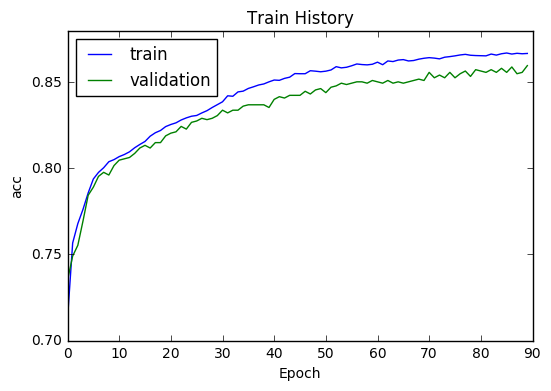

In [601]:
show_train_history(train_history,'acc','val_acc')

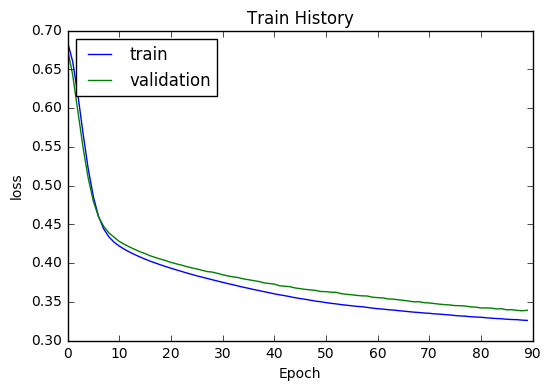

In [602]:
show_train_history(train_history,'loss','val_loss')

In [603]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

6277/6277 [==============================] - 1s 192us/step


In [604]:
scores[1]

0.8561414688640441